# Analysis: Child Mortality from Rotavirus
![](https://d3bkbkx82g74b8.cloudfront.net/eyJidWNrZXQiOiJsYWJyb290cy1hc3NldHMiLCJrZXkiOiJfcHVibGljXC9fZmlsZXNcL3N5c3RlbVwvY2tcL3RyZW5kaW5nXC8yMTM1MV9sb3Jlc182NmU0Yzg3MjBiNGY3M2IyN2VlYjU1YWQzOTI4ZGQ3Yi5qcGciLCJlZGl0cyI6eyJyZXNpemUiOnsid2lkdGgiOjcwMCwiZml0IjoiY292ZXIifX19)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style(style='darkgrid')

In [2]:
data = pd.read_csv('../input/child-mortality-from-rotavirus/child-mortality-rotavirus.csv')
data

,Country,Code,mortality
0,Afghanistan,AFG,16.9
1,Albania,ALB,0.1
2,Algeria,DZA,0.9
3,American Samoa,ASM,0.5
4,Andorra,AND,0.2
...,...,...,...
210,Western Europe,NaN,0.2
211,Western Sub-Saharan Africa,NaN,110.3
212,Yemen,YEM,23.6
213,Zambia,ZMB,25.4


In [3]:
data.isna().sum().to_frame('Null Values')

,Null Values
Country,0
Code,22
mortality,0


In [4]:
data = data.set_index('Country')
data.head()

,Code,mortality
Country,,
Afghanistan,AFG,16.9
Albania,ALB,0.1
Algeria,DZA,0.9
American Samoa,ASM,0.5
Andorra,AND,0.2


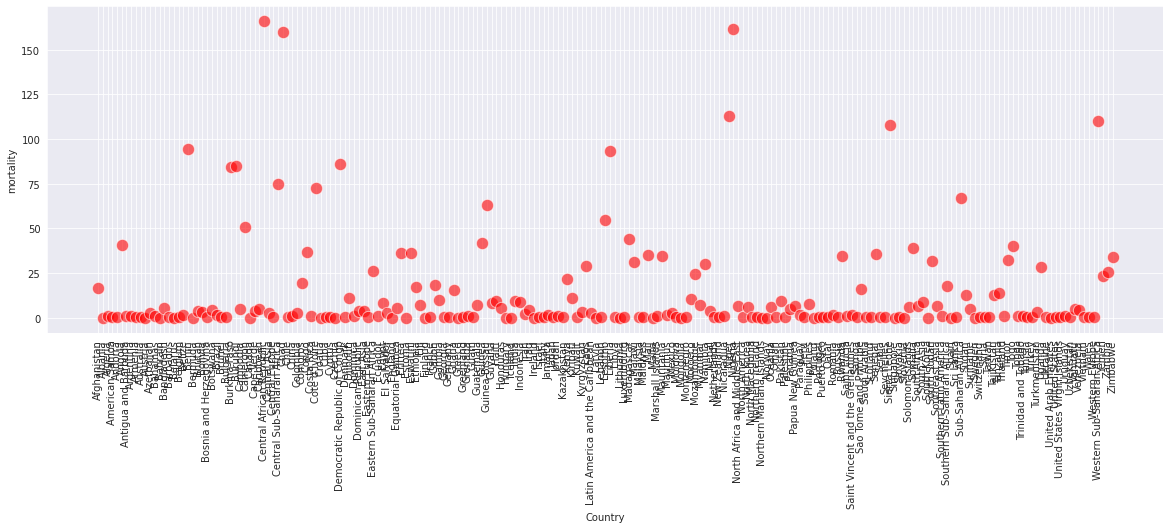

In [5]:
plt.figure(figsize=(20,6))
sns.scatterplot(data.index, data.mortality, s=150, alpha=0.6, color='Red')
plt.xticks(rotation='vertical')
plt.show()

In [6]:
data = data.sort_values('mortality', ascending=False)
data

,Code,mortality
Country,,
Central African Republic,CAF,166.0
Nigeria,NGA,161.5
Chad,TCD,160.1
Niger,NER,112.9
Western Sub-Saharan Africa,NaN,110.3
...,...,...
Latvia,LVA,0.1
Albania,ALB,0.1
Estonia,EST,0.0


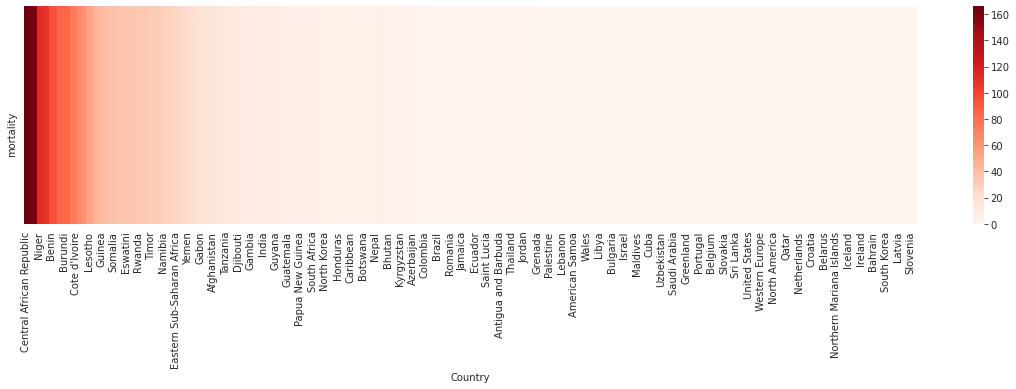

In [7]:
plt.figure(figsize=(20,4))
sns.heatmap(data.drop('Code',axis=1).T, cmap='Reds')
plt.show()

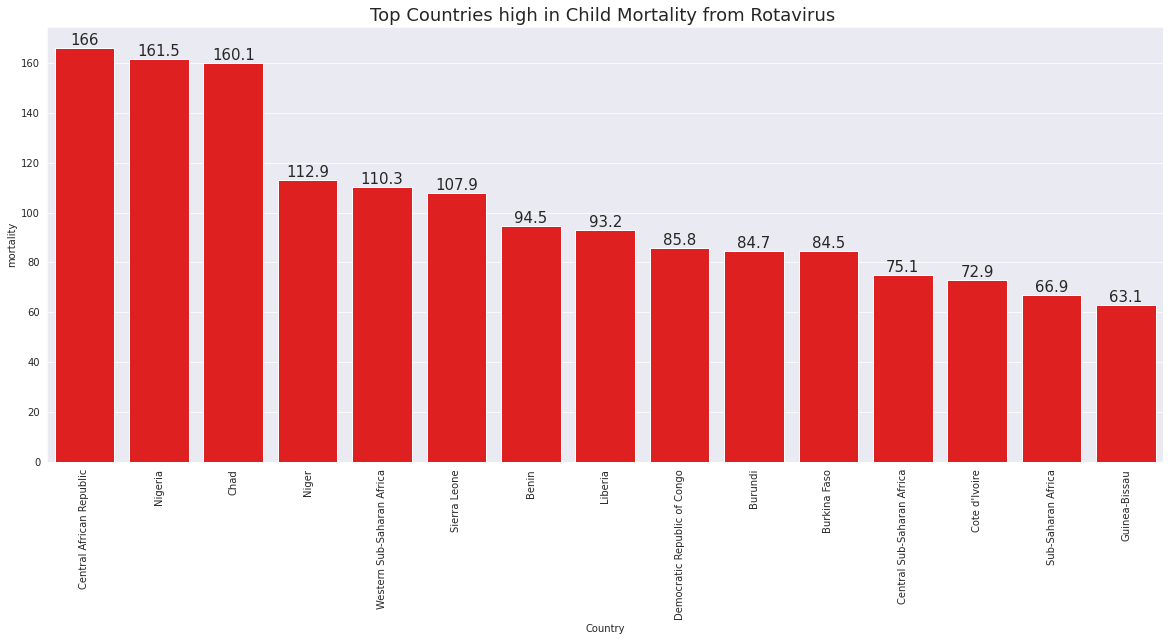

In [8]:
plt.figure(figsize=(20,8))
plot = sns.barplot(data.index[:15], data.mortality[:15], color='Red')
plt.bar_label(plot.containers[0], size=15)
plt.xticks(rotation='vertical')
plt.title('Top Countries high in Child Mortality from Rotavirus ', fontsize=18)
plt.show()

In [9]:
print(f'Countries where no Rotavirus infection reported: {data[data.mortality==0].index.tolist()}')

Countries where no Rotavirus infection reported: ['Estonia', 'Slovenia', 'Greece']


In [10]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [11]:
map_data = dict(type = 'choropleth', locations = data.index,
                locationmode = 'country names', z = data.mortality, text=data.Code, 
                colorscale= 'Reds', marker = dict(line = dict(color='black',width=0.5)))
layout = dict(title = 'Child Mortality from Rotavirus',
              geo = dict(showframe = False, projection = {'type':'natural earth'}))
choromap = go.Figure(data=map_data, layout=layout)
iplot(choromap)

## Thank You!